In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
import random

In [2]:
data = np.load('olivetti_faces.npy')
target = np.load('olivetti_faces_target.npy')


# print("### 10 million points of data ###")
# print("\nData summary:\n", target)
# print("\nData shape:\n", target.shape)

# print("### 10 million points of data ###")
# print("\nData summary:\n", data)
# print("\nData shape:\n", data.shape)

In [3]:
nsamples, nx, ny = data.shape
data_d2 = data.reshape((nsamples,nx*ny))
# print("### 10 million points of data ###")
# print("\nData summary:\n", data_d2)
# print("\nData shape:\n", data_d2.shape)

In [4]:
feat_cols = ['pixel'+str(i) for i in range(data_d2.shape[1])]
data_d2_test = []
target_test = []
for i in range(0,100):
    a = 300
    b = random.randint(0,a)
    data_d2_test.append(data_d2[b])
    data_d2 = np.delete(data_d2,b,axis=0)
    target_test.append(target[b])
    target = np.delete(target,b)
    a = a-1
print(target.shape)
df_cifar = pd.DataFrame(data_d2,columns=feat_cols)
df_cifar

(300,)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4086,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
2,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
3,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554
4,0.330579,0.305785,0.330579,0.351240,0.425620,0.500000,0.603306,0.632231,0.644628,0.644628,...,0.516529,0.541322,0.541322,0.524793,0.537190,0.487603,0.190083,0.144628,0.152893,0.152893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.388430,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364
296,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.380165,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587
297,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.194215,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083
298,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.446281,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306


(300, 300)


<Figure size 432x288 with 0 Axes>

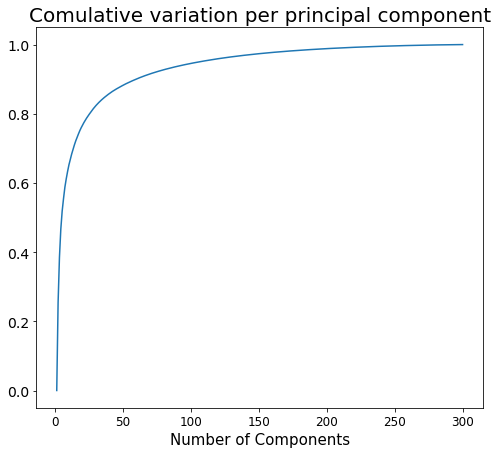

Explained variation per principal component for the first two PCs: [0.25402546 0.13104819]


In [5]:
pca = PCA()
principalComponents = pca.fit_transform(data_d2)
print(principalComponents.shape)


xs = np.array(range(1,301))
plt.figure()
plt.figure(figsize=(8,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
comulative_variance = []
sum = 0
for i in range(0,300):
    sum = 0
    for j in range(0,i):
        sum = sum + pca.explained_variance_ratio_[j]
    comulative_variance.append(sum)
    
plt.plot(xs, comulative_variance)
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('',fontsize=15)
plt.title("Comulative variation per principal component",fontsize=20)
plt.show()
print('Explained variation per principal component for the first two PCs: {}'.format(pca.explained_variance_ratio_[0:2]))

In [6]:
n_comp = 0 
for i in range(0,300):
    if comulative_variance[i]>0.9:
        n_comp = i
        break
print(n_comp)

#find the number of components with comulate vriance at least 0.9 ran

59


In [7]:
# pca = PCA()
# pca.fit(data_d2)
pca = PCA(n_components = n_comp)
pca.fit(data_d2)
transformed_data = pca.fit_transform(data_d2)
transformed_data.shape

(300, 59)

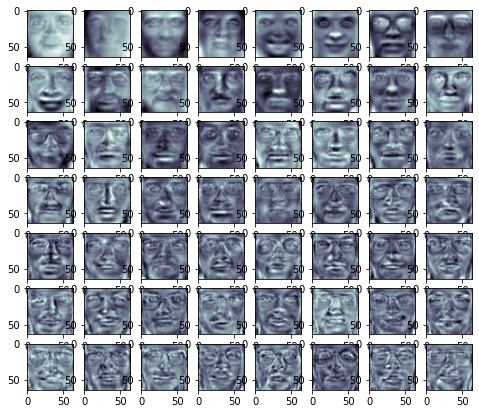

In [8]:
eigenv = pca.components_
eigenv.shape
eigenfaces = eigenv.reshape(n_comp,64,64)
fig = plt.figure(figsize = (8,8))
for i in range(int(n_comp/8)*8):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i] , cmap = plt.cm.bone)
plt.show()

In [9]:
xtrain_pca = transformed_data
xtest_pca = pca.transform(data_d2_test)
rf = ensemble.RandomForestClassifier()
rf.fit(data_d2,target)
ypred= rf.predict(data_d2_test)
print(classification_report(target_test,ypred))
print(confusion_matrix(target_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       0.67      1.00      0.80         2
           3       1.00      0.50      0.67         4
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       1.00      0.75      0.86         4
           7       0.80      0.80      0.80         5
           8       1.00      1.00      1.00         4
           9       1.00      0.50      0.67         2
          10       0.67      1.00      0.80         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00         4
          17       1.00    

/Users/hediyeraisy/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hediyeraisy/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hediyeraisy/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
